# Introduction to Neural Networks: SVHN Digit Recognition<a href="#Introduction-to-Neural-Networks:-SVHN-Digit-Recognition" class="anchor-link">¶</a>

## Problem Statement<a href="#Problem-Statement" class="anchor-link">¶</a>

### Context<a href="#Context" class="anchor-link">¶</a>

The ability to process visual information using machine learning
algorithms can be very useful as demonstrated in various applications.
The Street View House Numbers (SVHN) dataset is one of the most popular
ones. It has been used in neural networks created by Google to read
house numbers and match them to their geolocations.

### Objective<a href="#Objective" class="anchor-link">¶</a>

To build a model that can identify house numbers in an image.

### Data Dictionary<a href="#Data-Dictionary" class="anchor-link">¶</a>

-   Number of classes: 10
-   Training data: 42000 images
-   Testing data: 18000 images

## Importing necessary libraries<a href="#Importing-necessary-libraries" class="anchor-link">¶</a>

In \[71\]:

    # Please run this code if you see a tensorflow.keras.wrappers error
    # pip install tensorflow==2.8.2

In \[72\]:

    # Libraries to help with reading and manipulating data
    import pandas as pd
    import numpy as np
    # Library to split data
    from sklearn.model_selection import train_test_split
    # Library to encode the variables
    from sklearn import preprocessing
    # To plot confusion matrix
    from sklearn.metrics import confusion_matrix
    # libaries to help with data visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    # library to import to standardize the data
    from sklearn.preprocessing import StandardScaler
    #To import different metrics
    from sklearn import metrics
    from tensorflow.keras import backend
    # importing different functions to build models
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout
    from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
    import tensorflow as tf
    import random
    #Importing classback API
    from keras import callbacks
    from keras.utils import np_utils
    from tensorflow.keras.optimizers import Adam
    from tensorflow.keras import losses

    # Library to avoid the warnings
    import warnings
    warnings.filterwarnings("ignore")

## Loading the dataset<a href="#Loading-the-dataset" class="anchor-link">¶</a>

In \[75\]:

    from google.colab import drive
    drive.mount('/content/drive')

    Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

In \[76\]:

    ## Reading the dataset
    X_test = pd.read_csv("/content/drive/MyDrive/AIML/Introduction to Neural Networks/Project/Test/X_test.csv")
    X_train = pd.read_csv("/content/drive/MyDrive/AIML/Introduction to Neural Networks/Project/Train/X_train.csv")
    y_test = pd.read_csv("/content/drive/MyDrive/AIML/Introduction to Neural Networks/Project/Test/y_test.csv")
    y_train = pd.read_csv("/content/drive/MyDrive/AIML/Introduction to Neural Networks/Project/Train/y_train.csv")

## Normalize the data<a href="#Normalize-the-data" class="anchor-link">¶</a>

In \[77\]:

    # normalize inputs from 0-255 to 0-1; to be used with the NN
    X_train = X_train / 255.0
    X_test = X_test/ 255.0

## Encode the target variable<a href="#Encode-the-target-variable" class="anchor-link">¶</a>

In \[78\]:

    # Encode the target variable
    y_train_en = np_utils.to_categorical(y_train)
    y_test_en = np_utils.to_categorical(y_test)

## Model Building: Neural Network<a href="#Model-Building:-Neural-Network" class="anchor-link">¶</a>

In \[79\]:

    # Here is a function to help plot a confusion matrix
    def make_confusion_matrix(
          cf,
          group_names=None,
          categories='auto',
          count=True,
          percent=True,
          cbar=True,
          xyticks=True,
          xyplotlabels=True,
          sum_stats=True,
          figsize=(20, 15),
          cmap='Blues',
          title=None
    ):
        '''
        This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
        Arguments
        '''


        # CODE TO GENERATE TEXT INSIDE EACH SQUARE
        blanks = ['' for i in range(cf.size)]

        if group_names and len(group_names)==cf.size:
            group_labels = ["{}\n".format(value) for value in group_names]
        else:
            group_labels = blanks

        if count:
            group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
        else:
            group_counts = blanks

        if percent:
            group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
        else:
            group_percentages = blanks

        box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
        box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


        # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
        if sum_stats:
            #Accuracy is sum of diagonal divided by total observations
            accuracy  = np.trace(cf) / float(np.sum(cf))

            # If it is a binary confusion matrix, show some more stats
            if len(cf)==2:
                # Metrics for Binary Confusion Matrices
                precision = cf[1,1] / sum(cf[:,1])
                recall    = cf[1,1] / sum(cf[1,:])
                f1_score  = 2*precision*recall / (precision + recall)
                stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                    accuracy,precision,recall,f1_score)
            else:
                stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
        else:
            stats_text = ""


        # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
        if figsize==None:
            #Get default figure size if not set
            figsize = plt.rcParams.get('figure.figsize')

        if xyticks==False:
            # Do not show categories if xyticks is False
            categories=False


        # MAKE THE HEATMAP VISUALIZATION
        plt.figure(figsize=figsize)
        sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

        if xyplotlabels:
            plt.ylabel('True label')
            plt.xlabel('Predicted label' + stats_text)
        else:
            plt.xlabel(stats_text)

        if title:
            plt.title(title)

In \[80\]:

    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(42)
    random.seed(42)
    tf.random.set_seed(42)

In \[81\]:

    model = Sequential()

    # Add the input layer with 256 neurons with relu as activation function with input of 1024 variables
    model.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform', input_shape=(1024,)))

    # Add the hidden layer with 64 neurons with relu as activation function
    model.add(Dense(units=64, activation='relu' ,kernel_initializer='he_uniform'))

    # Add the hidden layer with 64 neurons with relu as activation function
    model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))

    # Add the hidden layer with 64 neurons with relu as activation function
    model.add(Dense(units=64, activation='relu', kernel_initializer='he_uniform'))

    # Add the output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
    model.add(Dense(10, activation='softmax'))

In \[82\]:

    # Compile the model with Adam optimizer and categorical cross entropy as loss with accuracy as metrics
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In \[83\]:

    # Get a summary of the model
    model.summary()

    Model: "sequential"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     dense (Dense)               (None, 256)               262400    
                                                                     
     dense_1 (Dense)             (None, 64)                16448     
                                                                     
     dense_2 (Dense)             (None, 64)                4160      
                                                                     
     dense_3 (Dense)             (None, 64)                4160      
                                                                     
     dense_4 (Dense)             (None, 10)                650       
                                                                     
    =================================================================
    Total params: 287,818
    Trainable params: 287,818
    Non-trainable params: 0
    _________________________________________________________________

In \[84\]:

    # Fit the model on X_train and y_train_en data for 100 epochs
    history = model.fit(
        X_train, y_train_en,
        validation_split=0.2,
        epochs=100,
        batch_size=128,
        verbose=2
    )

    Epoch 1/100
    263/263 - 3s - loss: 2.2943 - accuracy: 0.1230 - val_loss: 2.1786 - val_accuracy: 0.1842 - 3s/epoch - 10ms/step
    Epoch 2/100
    263/263 - 2s - loss: 1.7348 - accuracy: 0.4003 - val_loss: 1.4870 - val_accuracy: 0.4956 - 2s/epoch - 7ms/step
    Epoch 3/100
    263/263 - 2s - loss: 1.3814 - accuracy: 0.5453 - val_loss: 1.3025 - val_accuracy: 0.5836 - 2s/epoch - 9ms/step
    Epoch 4/100
    263/263 - 3s - loss: 1.2570 - accuracy: 0.5928 - val_loss: 1.1992 - val_accuracy: 0.6118 - 3s/epoch - 12ms/step
    Epoch 5/100
    263/263 - 3s - loss: 1.1507 - accuracy: 0.6352 - val_loss: 1.1190 - val_accuracy: 0.6475 - 3s/epoch - 11ms/step
    Epoch 6/100
    263/263 - 2s - loss: 1.0903 - accuracy: 0.6575 - val_loss: 1.0849 - val_accuracy: 0.6615 - 2s/epoch - 6ms/step
    Epoch 7/100
    263/263 - 2s - loss: 1.0473 - accuracy: 0.6711 - val_loss: 1.0194 - val_accuracy: 0.6844 - 2s/epoch - 7ms/step
    Epoch 8/100
    263/263 - 2s - loss: 1.0075 - accuracy: 0.6835 - val_loss: 0.9711 - val_accuracy: 0.7020 - 2s/epoch - 7ms/step
    Epoch 9/100
    263/263 - 2s - loss: 0.9699 - accuracy: 0.6975 - val_loss: 0.9565 - val_accuracy: 0.7037 - 2s/epoch - 7ms/step
    Epoch 10/100
    263/263 - 2s - loss: 0.9407 - accuracy: 0.7071 - val_loss: 0.9533 - val_accuracy: 0.7044 - 2s/epoch - 7ms/step
    Epoch 11/100
    263/263 - 2s - loss: 0.9022 - accuracy: 0.7197 - val_loss: 0.9177 - val_accuracy: 0.7140 - 2s/epoch - 8ms/step
    Epoch 12/100
    263/263 - 3s - loss: 0.8794 - accuracy: 0.7273 - val_loss: 0.9372 - val_accuracy: 0.7043 - 3s/epoch - 13ms/step
    Epoch 13/100
    263/263 - 3s - loss: 0.8584 - accuracy: 0.7314 - val_loss: 0.8848 - val_accuracy: 0.7251 - 3s/epoch - 11ms/step
    Epoch 14/100
    263/263 - 2s - loss: 0.8464 - accuracy: 0.7365 - val_loss: 0.9443 - val_accuracy: 0.7018 - 2s/epoch - 7ms/step
    Epoch 15/100
    263/263 - 2s - loss: 0.8320 - accuracy: 0.7394 - val_loss: 0.8551 - val_accuracy: 0.7368 - 2s/epoch - 7ms/step
    Epoch 16/100
    263/263 - 2s - loss: 0.8046 - accuracy: 0.7482 - val_loss: 0.9354 - val_accuracy: 0.7071 - 2s/epoch - 7ms/step
    Epoch 17/100
    263/263 - 2s - loss: 0.7943 - accuracy: 0.7528 - val_loss: 0.8713 - val_accuracy: 0.7365 - 2s/epoch - 7ms/step
    Epoch 18/100
    263/263 - 2s - loss: 0.7899 - accuracy: 0.7555 - val_loss: 0.8785 - val_accuracy: 0.7268 - 2s/epoch - 7ms/step
    Epoch 19/100
    263/263 - 2s - loss: 0.7741 - accuracy: 0.7551 - val_loss: 0.8647 - val_accuracy: 0.7287 - 2s/epoch - 8ms/step
    Epoch 20/100
    263/263 - 3s - loss: 0.7523 - accuracy: 0.7641 - val_loss: 0.8436 - val_accuracy: 0.7388 - 3s/epoch - 11ms/step
    Epoch 21/100
    263/263 - 3s - loss: 0.7473 - accuracy: 0.7673 - val_loss: 0.7868 - val_accuracy: 0.7545 - 3s/epoch - 12ms/step
    Epoch 22/100
    263/263 - 2s - loss: 0.7364 - accuracy: 0.7693 - val_loss: 0.7862 - val_accuracy: 0.7589 - 2s/epoch - 7ms/step
    Epoch 23/100
    263/263 - 2s - loss: 0.7217 - accuracy: 0.7738 - val_loss: 0.8045 - val_accuracy: 0.7514 - 2s/epoch - 7ms/step
    Epoch 24/100
    263/263 - 2s - loss: 0.7144 - accuracy: 0.7774 - val_loss: 0.7877 - val_accuracy: 0.7599 - 2s/epoch - 6ms/step
    Epoch 25/100
    263/263 - 2s - loss: 0.7069 - accuracy: 0.7781 - val_loss: 0.7687 - val_accuracy: 0.7688 - 2s/epoch - 7ms/step
    Epoch 26/100
    263/263 - 2s - loss: 0.6839 - accuracy: 0.7853 - val_loss: 0.8020 - val_accuracy: 0.7561 - 2s/epoch - 7ms/step
    Epoch 27/100
    263/263 - 2s - loss: 0.6920 - accuracy: 0.7833 - val_loss: 0.7494 - val_accuracy: 0.7706 - 2s/epoch - 9ms/step
    Epoch 28/100
    263/263 - 3s - loss: 0.6784 - accuracy: 0.7865 - val_loss: 0.7924 - val_accuracy: 0.7570 - 3s/epoch - 11ms/step
    Epoch 29/100
    263/263 - 3s - loss: 0.6612 - accuracy: 0.7938 - val_loss: 0.7694 - val_accuracy: 0.7700 - 3s/epoch - 11ms/step
    Epoch 30/100
    263/263 - 2s - loss: 0.6564 - accuracy: 0.7949 - val_loss: 0.7478 - val_accuracy: 0.7725 - 2s/epoch - 7ms/step
    Epoch 31/100
    263/263 - 2s - loss: 0.6337 - accuracy: 0.8005 - val_loss: 0.7990 - val_accuracy: 0.7560 - 2s/epoch - 7ms/step
    Epoch 32/100
    263/263 - 2s - loss: 0.6381 - accuracy: 0.7988 - val_loss: 0.7831 - val_accuracy: 0.7589 - 2s/epoch - 7ms/step
    Epoch 33/100
    263/263 - 2s - loss: 0.6321 - accuracy: 0.8001 - val_loss: 0.7587 - val_accuracy: 0.7765 - 2s/epoch - 7ms/step
    Epoch 34/100
    263/263 - 2s - loss: 0.6351 - accuracy: 0.8008 - val_loss: 0.7891 - val_accuracy: 0.7583 - 2s/epoch - 7ms/step
    Epoch 35/100
    263/263 - 2s - loss: 0.6238 - accuracy: 0.8039 - val_loss: 0.7527 - val_accuracy: 0.7725 - 2s/epoch - 7ms/step
    Epoch 36/100
    263/263 - 3s - loss: 0.6184 - accuracy: 0.8066 - val_loss: 0.7175 - val_accuracy: 0.7835 - 3s/epoch - 11ms/step
    Epoch 37/100
    263/263 - 3s - loss: 0.5952 - accuracy: 0.8143 - val_loss: 0.7657 - val_accuracy: 0.7694 - 3s/epoch - 11ms/step
    Epoch 38/100
    263/263 - 2s - loss: 0.5968 - accuracy: 0.8120 - val_loss: 0.7384 - val_accuracy: 0.7799 - 2s/epoch - 8ms/step
    Epoch 39/100
    263/263 - 2s - loss: 0.5842 - accuracy: 0.8152 - val_loss: 0.7234 - val_accuracy: 0.7817 - 2s/epoch - 7ms/step
    Epoch 40/100
    263/263 - 2s - loss: 0.5868 - accuracy: 0.8133 - val_loss: 0.7556 - val_accuracy: 0.7724 - 2s/epoch - 6ms/step
    Epoch 41/100
    263/263 - 2s - loss: 0.5731 - accuracy: 0.8190 - val_loss: 0.7646 - val_accuracy: 0.7656 - 2s/epoch - 6ms/step
    Epoch 42/100
    263/263 - 2s - loss: 0.5828 - accuracy: 0.8150 - val_loss: 0.7218 - val_accuracy: 0.7873 - 2s/epoch - 7ms/step
    Epoch 43/100
    263/263 - 2s - loss: 0.5721 - accuracy: 0.8188 - val_loss: 0.7360 - val_accuracy: 0.7743 - 2s/epoch - 6ms/step
    Epoch 44/100
    263/263 - 3s - loss: 0.5603 - accuracy: 0.8239 - val_loss: 0.7271 - val_accuracy: 0.7854 - 3s/epoch - 10ms/step
    Epoch 45/100
    263/263 - 3s - loss: 0.5709 - accuracy: 0.8180 - val_loss: 0.7068 - val_accuracy: 0.7887 - 3s/epoch - 11ms/step
    Epoch 46/100
    263/263 - 3s - loss: 0.5554 - accuracy: 0.8238 - val_loss: 0.6855 - val_accuracy: 0.7963 - 3s/epoch - 10ms/step
    Epoch 47/100
    263/263 - 2s - loss: 0.5528 - accuracy: 0.8260 - val_loss: 0.7161 - val_accuracy: 0.7889 - 2s/epoch - 7ms/step
    Epoch 48/100
    263/263 - 2s - loss: 0.5397 - accuracy: 0.8285 - val_loss: 0.7000 - val_accuracy: 0.7913 - 2s/epoch - 7ms/step
    Epoch 49/100
    263/263 - 2s - loss: 0.5424 - accuracy: 0.8274 - val_loss: 0.7309 - val_accuracy: 0.7877 - 2s/epoch - 7ms/step
    Epoch 50/100
    263/263 - 2s - loss: 0.5273 - accuracy: 0.8318 - val_loss: 0.7075 - val_accuracy: 0.7919 - 2s/epoch - 7ms/step
    Epoch 51/100
    263/263 - 2s - loss: 0.5296 - accuracy: 0.8328 - val_loss: 0.7286 - val_accuracy: 0.7837 - 2s/epoch - 6ms/step
    Epoch 52/100
    263/263 - 3s - loss: 0.5439 - accuracy: 0.8265 - val_loss: 0.7051 - val_accuracy: 0.7900 - 3s/epoch - 10ms/step
    Epoch 53/100
    263/263 - 3s - loss: 0.5180 - accuracy: 0.8358 - val_loss: 0.6945 - val_accuracy: 0.7944 - 3s/epoch - 12ms/step
    Epoch 54/100
    263/263 - 3s - loss: 0.5179 - accuracy: 0.8354 - val_loss: 0.7488 - val_accuracy: 0.7774 - 3s/epoch - 10ms/step
    Epoch 55/100
    263/263 - 2s - loss: 0.5156 - accuracy: 0.8369 - val_loss: 0.7538 - val_accuracy: 0.7805 - 2s/epoch - 6ms/step
    Epoch 56/100
    263/263 - 2s - loss: 0.5225 - accuracy: 0.8337 - val_loss: 0.7122 - val_accuracy: 0.7917 - 2s/epoch - 6ms/step
    Epoch 57/100
    263/263 - 2s - loss: 0.5037 - accuracy: 0.8399 - val_loss: 0.7007 - val_accuracy: 0.7980 - 2s/epoch - 6ms/step
    Epoch 58/100
    263/263 - 2s - loss: 0.4966 - accuracy: 0.8418 - val_loss: 0.7205 - val_accuracy: 0.7907 - 2s/epoch - 7ms/step
    Epoch 59/100
    263/263 - 2s - loss: 0.4901 - accuracy: 0.8444 - val_loss: 0.7060 - val_accuracy: 0.7924 - 2s/epoch - 6ms/step
    Epoch 60/100
    263/263 - 2s - loss: 0.4983 - accuracy: 0.8391 - val_loss: 0.7212 - val_accuracy: 0.7887 - 2s/epoch - 8ms/step
    Epoch 61/100
    263/263 - 3s - loss: 0.4895 - accuracy: 0.8437 - val_loss: 0.7134 - val_accuracy: 0.7962 - 3s/epoch - 11ms/step
    Epoch 62/100
    263/263 - 3s - loss: 0.4949 - accuracy: 0.8422 - val_loss: 0.7735 - val_accuracy: 0.7745 - 3s/epoch - 11ms/step
    Epoch 63/100
    263/263 - 2s - loss: 0.4784 - accuracy: 0.8472 - val_loss: 0.8055 - val_accuracy: 0.7658 - 2s/epoch - 8ms/step
    Epoch 64/100
    263/263 - 2s - loss: 0.4836 - accuracy: 0.8445 - val_loss: 0.7113 - val_accuracy: 0.7950 - 2s/epoch - 6ms/step
    Epoch 65/100
    263/263 - 2s - loss: 0.4831 - accuracy: 0.8460 - val_loss: 0.7469 - val_accuracy: 0.7863 - 2s/epoch - 6ms/step
    Epoch 66/100
    263/263 - 2s - loss: 0.4754 - accuracy: 0.8472 - val_loss: 0.7193 - val_accuracy: 0.7870 - 2s/epoch - 7ms/step
    Epoch 67/100
    263/263 - 2s - loss: 0.4688 - accuracy: 0.8493 - val_loss: 0.7115 - val_accuracy: 0.7969 - 2s/epoch - 6ms/step
    Epoch 68/100
    263/263 - 2s - loss: 0.4647 - accuracy: 0.8528 - val_loss: 0.7480 - val_accuracy: 0.7894 - 2s/epoch - 7ms/step
    Epoch 69/100
    263/263 - 3s - loss: 0.4697 - accuracy: 0.8499 - val_loss: 0.7235 - val_accuracy: 0.7969 - 3s/epoch - 11ms/step
    Epoch 70/100
    263/263 - 3s - loss: 0.4572 - accuracy: 0.8525 - val_loss: 0.7132 - val_accuracy: 0.7951 - 3s/epoch - 11ms/step
    Epoch 71/100
    263/263 - 2s - loss: 0.4613 - accuracy: 0.8518 - val_loss: 0.7202 - val_accuracy: 0.7976 - 2s/epoch - 9ms/step
    Epoch 72/100
    263/263 - 2s - loss: 0.4668 - accuracy: 0.8503 - val_loss: 0.7149 - val_accuracy: 0.7967 - 2s/epoch - 6ms/step
    Epoch 73/100
    263/263 - 2s - loss: 0.4606 - accuracy: 0.8523 - val_loss: 0.6928 - val_accuracy: 0.8024 - 2s/epoch - 7ms/step
    Epoch 74/100
    263/263 - 2s - loss: 0.4630 - accuracy: 0.8525 - val_loss: 0.7642 - val_accuracy: 0.7760 - 2s/epoch - 6ms/step
    Epoch 75/100
    263/263 - 2s - loss: 0.4461 - accuracy: 0.8560 - val_loss: 0.7151 - val_accuracy: 0.7943 - 2s/epoch - 6ms/step
    Epoch 76/100
    263/263 - 2s - loss: 0.4514 - accuracy: 0.8545 - val_loss: 0.7144 - val_accuracy: 0.8031 - 2s/epoch - 7ms/step
    Epoch 77/100
    263/263 - 2s - loss: 0.4503 - accuracy: 0.8543 - val_loss: 0.7109 - val_accuracy: 0.8026 - 2s/epoch - 9ms/step
    Epoch 78/100
    263/263 - 3s - loss: 0.4308 - accuracy: 0.8631 - val_loss: 0.7392 - val_accuracy: 0.7950 - 3s/epoch - 11ms/step
    Epoch 79/100
    263/263 - 3s - loss: 0.4435 - accuracy: 0.8557 - val_loss: 0.7453 - val_accuracy: 0.7905 - 3s/epoch - 11ms/step
    Epoch 80/100
    263/263 - 2s - loss: 0.4460 - accuracy: 0.8563 - val_loss: 0.7140 - val_accuracy: 0.7975 - 2s/epoch - 7ms/step
    Epoch 81/100
    263/263 - 2s - loss: 0.4278 - accuracy: 0.8630 - val_loss: 0.7691 - val_accuracy: 0.7885 - 2s/epoch - 7ms/step
    Epoch 82/100
    263/263 - 2s - loss: 0.4346 - accuracy: 0.8595 - val_loss: 0.7126 - val_accuracy: 0.7990 - 2s/epoch - 6ms/step
    Epoch 83/100
    263/263 - 2s - loss: 0.4196 - accuracy: 0.8649 - val_loss: 0.7193 - val_accuracy: 0.7976 - 2s/epoch - 6ms/step
    Epoch 84/100
    263/263 - 2s - loss: 0.4286 - accuracy: 0.8626 - val_loss: 0.7135 - val_accuracy: 0.8049 - 2s/epoch - 7ms/step
    Epoch 85/100
    263/263 - 2s - loss: 0.4341 - accuracy: 0.8581 - val_loss: 0.7243 - val_accuracy: 0.7963 - 2s/epoch - 7ms/step
    Epoch 86/100
    263/263 - 3s - loss: 0.4300 - accuracy: 0.8601 - val_loss: 0.7327 - val_accuracy: 0.7995 - 3s/epoch - 11ms/step
    Epoch 87/100
    263/263 - 3s - loss: 0.4221 - accuracy: 0.8644 - val_loss: 0.7304 - val_accuracy: 0.7940 - 3s/epoch - 11ms/step
    Epoch 88/100
    263/263 - 2s - loss: 0.4114 - accuracy: 0.8675 - val_loss: 0.7241 - val_accuracy: 0.8021 - 2s/epoch - 9ms/step
    Epoch 89/100
    263/263 - 2s - loss: 0.4184 - accuracy: 0.8633 - val_loss: 0.7101 - val_accuracy: 0.8030 - 2s/epoch - 6ms/step
    Epoch 90/100
    263/263 - 2s - loss: 0.4223 - accuracy: 0.8635 - val_loss: 0.7301 - val_accuracy: 0.8001 - 2s/epoch - 7ms/step
    Epoch 91/100
    263/263 - 2s - loss: 0.3968 - accuracy: 0.8721 - val_loss: 0.7585 - val_accuracy: 0.7945 - 2s/epoch - 6ms/step
    Epoch 92/100
    263/263 - 2s - loss: 0.4037 - accuracy: 0.8696 - val_loss: 0.7386 - val_accuracy: 0.8018 - 2s/epoch - 7ms/step
    Epoch 93/100
    263/263 - 2s - loss: 0.4287 - accuracy: 0.8603 - val_loss: 0.7441 - val_accuracy: 0.7937 - 2s/epoch - 6ms/step
    Epoch 94/100
    263/263 - 2s - loss: 0.3970 - accuracy: 0.8703 - val_loss: 0.7597 - val_accuracy: 0.7939 - 2s/epoch - 9ms/step
    Epoch 95/100
    263/263 - 3s - loss: 0.4045 - accuracy: 0.8690 - val_loss: 0.7368 - val_accuracy: 0.7985 - 3s/epoch - 11ms/step
    Epoch 96/100
    263/263 - 3s - loss: 0.4072 - accuracy: 0.8692 - val_loss: 0.7434 - val_accuracy: 0.7954 - 3s/epoch - 10ms/step
    Epoch 97/100
    263/263 - 2s - loss: 0.3923 - accuracy: 0.8730 - val_loss: 0.7226 - val_accuracy: 0.8061 - 2s/epoch - 7ms/step
    Epoch 98/100
    263/263 - 2s - loss: 0.3842 - accuracy: 0.8751 - val_loss: 0.7458 - val_accuracy: 0.8002 - 2s/epoch - 7ms/step
    Epoch 99/100
    263/263 - 2s - loss: 0.3933 - accuracy: 0.8717 - val_loss: 0.7662 - val_accuracy: 0.7955 - 2s/epoch - 6ms/step
    Epoch 100/100
    263/263 - 2s - loss: 0.3853 - accuracy: 0.8739 - val_loss: 0.7564 - val_accuracy: 0.7980 - 2s/epoch - 7ms/step

**Loss function**

In \[85\]:

    # Capturing learning history per epoch
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    # Plotting accuracy at different epochs
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(('train' , 'valid') , loc=0)

Out\[85\]:

    <matplotlib.legend.Legend at 0x79779da06aa0>

![](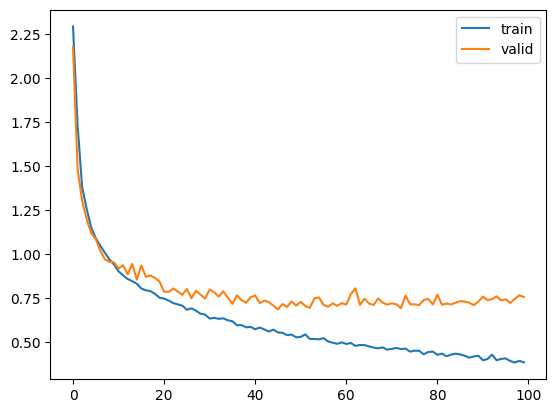%0A)

In \[86\]:

    # Predict the model on X_test data
    y_pred1 = model.predict(X_test)

    # Predict using argmax
    y_pred_arg = np.argmax(y_pred1, axis=1)

**Classification report**

In \[87\]:

    # Print the classification report
    cr = metrics.classification_report(y_test, y_pred_arg)
    print(cr)

                  precision    recall  f1-score   support

               0       0.81      0.86      0.83      1814
               1       0.76      0.86      0.81      1828
               2       0.80      0.81      0.80      1803
               3       0.78      0.76      0.77      1719
               4       0.84      0.84      0.84      1812
               5       0.81      0.76      0.79      1768
               6       0.85      0.75      0.80      1832
               7       0.85      0.80      0.82      1808
               8       0.70      0.78      0.74      1812
               9       0.81      0.76      0.78      1804

        accuracy                           0.80     18000
       macro avg       0.80      0.80      0.80     18000
    weighted avg       0.80      0.80      0.80     18000

**Confusion matrix**

In \[88\]:

    cm = confusion_matrix(y_test, y_pred_arg)

    # Plot the confusion matrix
    make_confusion_matrix(cm, cmap='Blues')
    plt.show()

![](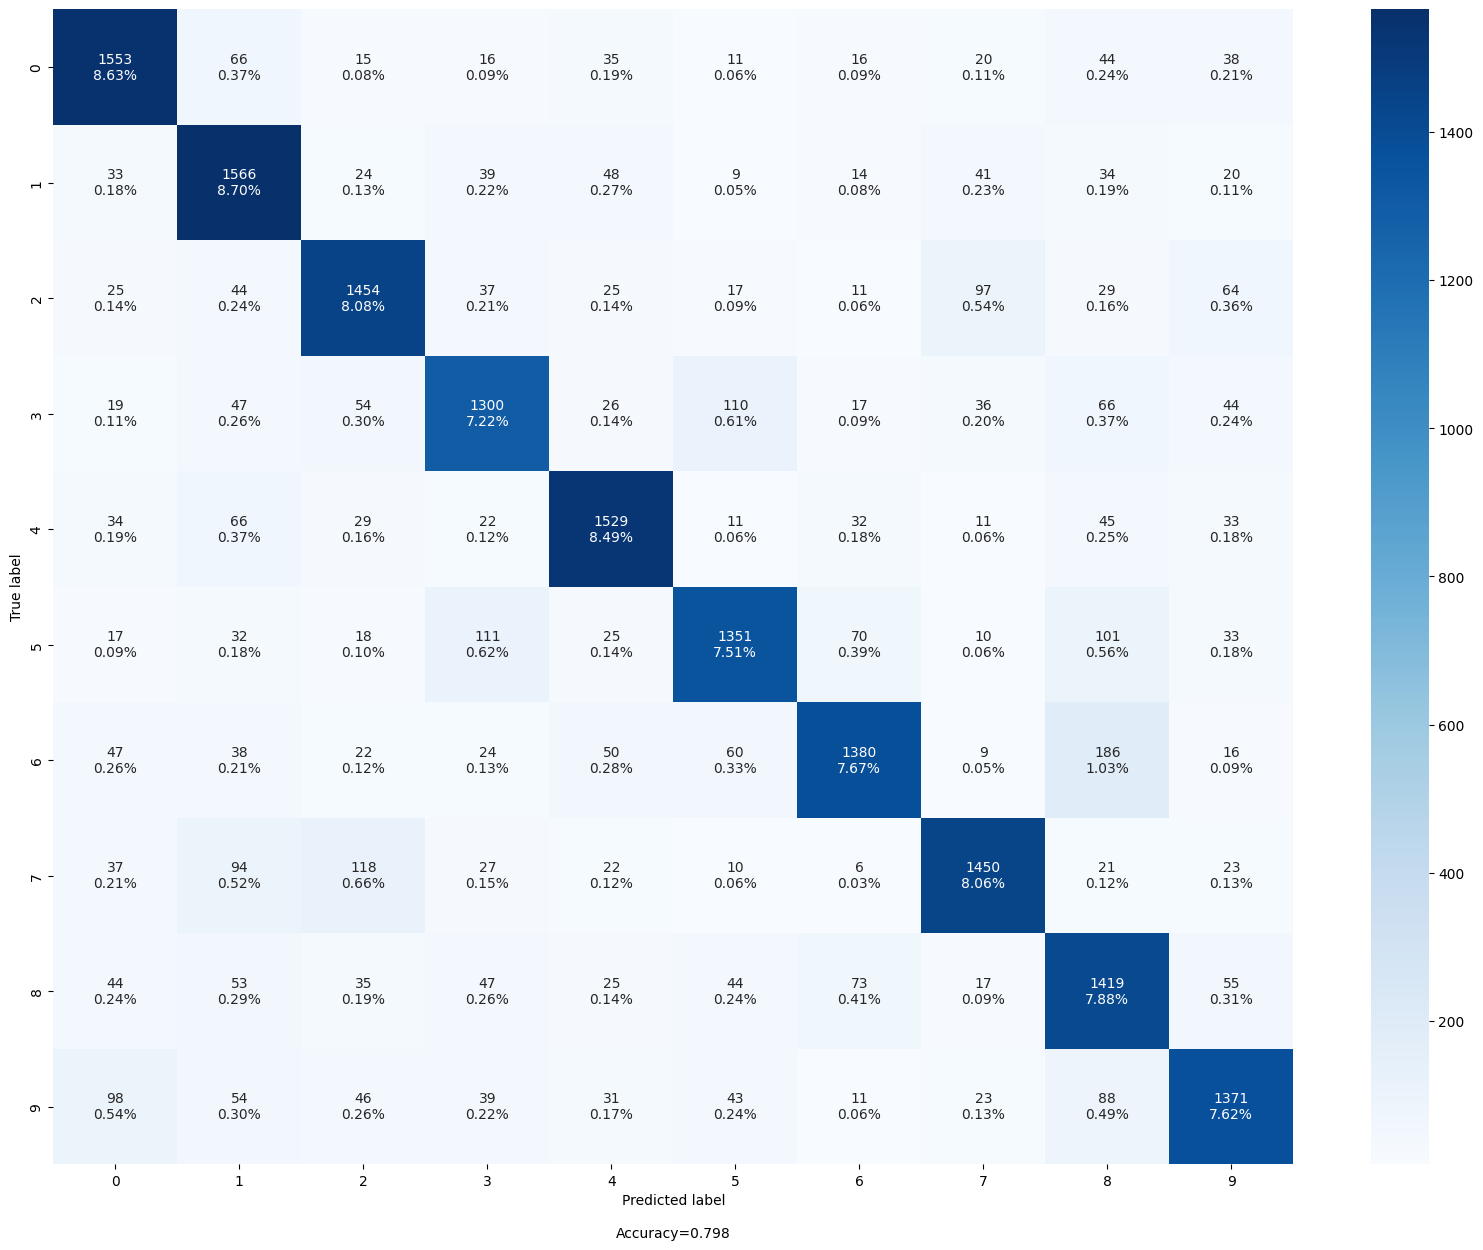%0A)

Comments

-   The accuracy of the standard model is about 80%
-   Precision is highest for the numbers 6 and 7
-   Recall is highest for the numbers 0 and 1
-   F1-score is highest for the number 4
-   There is a negligible presence of imbalance

## Model Improvement: Neural Network model with Adam Optimizer<a href="#Model-Improvement:-Neural-Network-model-with-Adam-Optimizer" class="anchor-link">¶</a>

In \[89\]:

    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(2)
    random.seed(2)
    tf.random.set_seed(2)

In \[90\]:

    def create_model():
          # Initializing the neural network
          model = Sequential()

          # Add the input layer with 64 neurons and relu as activation function
          model.add(Dense(units=64, activation='relu',input_dim = X_train.shape[1]))

          # Add the first hidden layer with 32 neurons with relu as activation functions
          model.add(Dense(units=32, activation='relu'))

          # Add the output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
          model.add(Dense(10, activation = 'softmax'))

          optimizer = tf.keras.optimizers.Adam(0.001)

          # Compile the model with binary cross entropy as loss function and accuracy as metrics
          model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

          return model

In \[91\]:

    # Initializing the above function
    model_2 = create_model()

    # Get the model summary
    model_2.summary()

    Model: "sequential"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     dense (Dense)               (None, 64)                65600     
                                                                     
     dense_1 (Dense)             (None, 32)                2080      
                                                                     
     dense_2 (Dense)             (None, 10)                330       
                                                                     
    =================================================================
    Total params: 68,010
    Trainable params: 68,010
    Non-trainable params: 0
    _________________________________________________________________

In \[92\]:

    # Fit the model on X_train and y_train_en data for 100 epochs
    history_2 = model_2.fit(
        X_train, y_train_en,
        validation_split=0.2,
        epochs=100,
        batch_size=128,
        verbose=2
    )

    Epoch 1/100
    263/263 - 2s - loss: 2.2996 - accuracy: 0.1168 - val_loss: 2.2598 - val_accuracy: 0.1587 - 2s/epoch - 6ms/step
    Epoch 2/100
    263/263 - 1s - loss: 2.0562 - accuracy: 0.2729 - val_loss: 1.8254 - val_accuracy: 0.3720 - 949ms/epoch - 4ms/step
    Epoch 3/100
    263/263 - 1s - loss: 1.6706 - accuracy: 0.4421 - val_loss: 1.5872 - val_accuracy: 0.4743 - 922ms/epoch - 4ms/step
    Epoch 4/100
    263/263 - 1s - loss: 1.4815 - accuracy: 0.5159 - val_loss: 1.4448 - val_accuracy: 0.5280 - 1s/epoch - 4ms/step
    Epoch 5/100
    263/263 - 1s - loss: 1.3749 - accuracy: 0.5554 - val_loss: 1.3431 - val_accuracy: 0.5692 - 911ms/epoch - 3ms/step
    Epoch 6/100
    263/263 - 1s - loss: 1.3115 - accuracy: 0.5791 - val_loss: 1.2976 - val_accuracy: 0.5876 - 914ms/epoch - 3ms/step
    Epoch 7/100
    263/263 - 1s - loss: 1.2634 - accuracy: 0.5981 - val_loss: 1.2676 - val_accuracy: 0.5977 - 946ms/epoch - 4ms/step
    Epoch 8/100
    263/263 - 1s - loss: 1.2331 - accuracy: 0.6087 - val_loss: 1.2166 - val_accuracy: 0.6190 - 1s/epoch - 4ms/step
    Epoch 9/100
    263/263 - 1s - loss: 1.2091 - accuracy: 0.6158 - val_loss: 1.2488 - val_accuracy: 0.5982 - 1s/epoch - 4ms/step
    Epoch 10/100
    263/263 - 1s - loss: 1.1911 - accuracy: 0.6251 - val_loss: 1.1717 - val_accuracy: 0.6342 - 1s/epoch - 4ms/step
    Epoch 11/100
    263/263 - 1s - loss: 1.1752 - accuracy: 0.6325 - val_loss: 1.1780 - val_accuracy: 0.6330 - 1s/epoch - 6ms/step
    Epoch 12/100
    263/263 - 2s - loss: 1.1603 - accuracy: 0.6368 - val_loss: 1.1761 - val_accuracy: 0.6307 - 2s/epoch - 6ms/step
    Epoch 13/100
    263/263 - 1s - loss: 1.1458 - accuracy: 0.6420 - val_loss: 1.1398 - val_accuracy: 0.6445 - 1s/epoch - 5ms/step
    Epoch 14/100
    263/263 - 1s - loss: 1.1333 - accuracy: 0.6477 - val_loss: 1.1442 - val_accuracy: 0.6437 - 1s/epoch - 5ms/step
    Epoch 15/100
    263/263 - 1s - loss: 1.1331 - accuracy: 0.6472 - val_loss: 1.1307 - val_accuracy: 0.6496 - 1s/epoch - 6ms/step
    Epoch 16/100
    263/263 - 1s - loss: 1.1208 - accuracy: 0.6522 - val_loss: 1.1252 - val_accuracy: 0.6529 - 923ms/epoch - 4ms/step
    Epoch 17/100
    263/263 - 1s - loss: 1.1103 - accuracy: 0.6536 - val_loss: 1.1125 - val_accuracy: 0.6527 - 1s/epoch - 4ms/step
    Epoch 18/100
    263/263 - 1s - loss: 1.1104 - accuracy: 0.6541 - val_loss: 1.1067 - val_accuracy: 0.6564 - 1s/epoch - 4ms/step
    Epoch 19/100
    263/263 - 1s - loss: 1.0995 - accuracy: 0.6590 - val_loss: 1.0936 - val_accuracy: 0.6573 - 1s/epoch - 4ms/step
    Epoch 20/100
    263/263 - 1s - loss: 1.0943 - accuracy: 0.6616 - val_loss: 1.1042 - val_accuracy: 0.6592 - 928ms/epoch - 4ms/step
    Epoch 21/100
    263/263 - 1s - loss: 1.0938 - accuracy: 0.6611 - val_loss: 1.0872 - val_accuracy: 0.6639 - 1s/epoch - 4ms/step
    Epoch 22/100
    263/263 - 1s - loss: 1.0835 - accuracy: 0.6654 - val_loss: 1.0936 - val_accuracy: 0.6579 - 961ms/epoch - 4ms/step
    Epoch 23/100
    263/263 - 1s - loss: 1.0840 - accuracy: 0.6646 - val_loss: 1.0798 - val_accuracy: 0.6650 - 1s/epoch - 4ms/step
    Epoch 24/100
    263/263 - 1s - loss: 1.0753 - accuracy: 0.6656 - val_loss: 1.0687 - val_accuracy: 0.6707 - 954ms/epoch - 4ms/step
    Epoch 25/100
    263/263 - 2s - loss: 1.0724 - accuracy: 0.6680 - val_loss: 1.0736 - val_accuracy: 0.6690 - 2s/epoch - 6ms/step
    Epoch 26/100
    263/263 - 2s - loss: 1.0675 - accuracy: 0.6704 - val_loss: 1.0669 - val_accuracy: 0.6744 - 2s/epoch - 6ms/step
    Epoch 27/100
    263/263 - 2s - loss: 1.0608 - accuracy: 0.6742 - val_loss: 1.0651 - val_accuracy: 0.6692 - 2s/epoch - 6ms/step
    Epoch 28/100
    263/263 - 1s - loss: 1.0546 - accuracy: 0.6763 - val_loss: 1.0511 - val_accuracy: 0.6793 - 1s/epoch - 6ms/step
    Epoch 29/100
    263/263 - 1s - loss: 1.0509 - accuracy: 0.6759 - val_loss: 1.0553 - val_accuracy: 0.6735 - 1s/epoch - 5ms/step
    Epoch 30/100
    263/263 - 1s - loss: 1.0506 - accuracy: 0.6770 - val_loss: 1.0512 - val_accuracy: 0.6804 - 947ms/epoch - 4ms/step
    Epoch 31/100
    263/263 - 1s - loss: 1.0426 - accuracy: 0.6793 - val_loss: 1.0604 - val_accuracy: 0.6743 - 977ms/epoch - 4ms/step
    Epoch 32/100
    263/263 - 1s - loss: 1.0399 - accuracy: 0.6826 - val_loss: 1.0526 - val_accuracy: 0.6739 - 960ms/epoch - 4ms/step
    Epoch 33/100
    263/263 - 1s - loss: 1.0353 - accuracy: 0.6827 - val_loss: 1.0723 - val_accuracy: 0.6683 - 939ms/epoch - 4ms/step
    Epoch 34/100
    263/263 - 1s - loss: 1.0382 - accuracy: 0.6810 - val_loss: 1.0311 - val_accuracy: 0.6836 - 981ms/epoch - 4ms/step
    Epoch 35/100
    263/263 - 1s - loss: 1.0334 - accuracy: 0.6821 - val_loss: 1.0547 - val_accuracy: 0.6764 - 956ms/epoch - 4ms/step
    Epoch 36/100
    263/263 - 1s - loss: 1.0327 - accuracy: 0.6822 - val_loss: 1.1011 - val_accuracy: 0.6594 - 992ms/epoch - 4ms/step
    Epoch 37/100
    263/263 - 1s - loss: 1.0271 - accuracy: 0.6820 - val_loss: 1.0799 - val_accuracy: 0.6598 - 1s/epoch - 4ms/step
    Epoch 38/100
    263/263 - 1s - loss: 1.0201 - accuracy: 0.6872 - val_loss: 1.0589 - val_accuracy: 0.6707 - 1s/epoch - 4ms/step
    Epoch 39/100
    263/263 - 1s - loss: 1.0173 - accuracy: 0.6868 - val_loss: 1.0907 - val_accuracy: 0.6599 - 1s/epoch - 4ms/step
    Epoch 40/100
    263/263 - 1s - loss: 1.0169 - accuracy: 0.6884 - val_loss: 1.0479 - val_accuracy: 0.6785 - 1s/epoch - 6ms/step
    Epoch 41/100
    263/263 - 2s - loss: 1.0113 - accuracy: 0.6910 - val_loss: 1.0605 - val_accuracy: 0.6673 - 2s/epoch - 6ms/step
    Epoch 42/100
    263/263 - 2s - loss: 1.0035 - accuracy: 0.6929 - val_loss: 1.0430 - val_accuracy: 0.6805 - 2s/epoch - 6ms/step
    Epoch 43/100
    263/263 - 1s - loss: 1.0040 - accuracy: 0.6920 - val_loss: 1.0148 - val_accuracy: 0.6895 - 1s/epoch - 6ms/step
    Epoch 44/100
    263/263 - 1s - loss: 0.9989 - accuracy: 0.6939 - val_loss: 1.0276 - val_accuracy: 0.6839 - 1s/epoch - 5ms/step
    Epoch 45/100
    263/263 - 1s - loss: 1.0003 - accuracy: 0.6923 - val_loss: 1.0114 - val_accuracy: 0.6939 - 1s/epoch - 4ms/step
    Epoch 46/100
    263/263 - 1s - loss: 0.9993 - accuracy: 0.6937 - val_loss: 1.0255 - val_accuracy: 0.6827 - 1s/epoch - 4ms/step
    Epoch 47/100
    263/263 - 1s - loss: 0.9886 - accuracy: 0.6973 - val_loss: 1.0175 - val_accuracy: 0.6883 - 947ms/epoch - 4ms/step
    Epoch 48/100
    263/263 - 1s - loss: 0.9910 - accuracy: 0.6953 - val_loss: 1.0021 - val_accuracy: 0.6951 - 1s/epoch - 4ms/step
    Epoch 49/100
    263/263 - 1s - loss: 0.9858 - accuracy: 0.6964 - val_loss: 0.9997 - val_accuracy: 0.6919 - 958ms/epoch - 4ms/step
    Epoch 50/100
    263/263 - 1s - loss: 0.9917 - accuracy: 0.6949 - val_loss: 1.0317 - val_accuracy: 0.6792 - 956ms/epoch - 4ms/step
    Epoch 51/100
    263/263 - 1s - loss: 0.9819 - accuracy: 0.6998 - val_loss: 1.0091 - val_accuracy: 0.6937 - 950ms/epoch - 4ms/step
    Epoch 52/100
    263/263 - 1s - loss: 0.9791 - accuracy: 0.7011 - val_loss: 0.9942 - val_accuracy: 0.6945 - 1s/epoch - 4ms/step
    Epoch 53/100
    263/263 - 1s - loss: 0.9835 - accuracy: 0.6975 - val_loss: 1.0307 - val_accuracy: 0.6868 - 941ms/epoch - 4ms/step
    Epoch 54/100
    263/263 - 1s - loss: 0.9735 - accuracy: 0.7018 - val_loss: 1.0417 - val_accuracy: 0.6789 - 1s/epoch - 5ms/step
    Epoch 55/100
    263/263 - 2s - loss: 0.9699 - accuracy: 0.7039 - val_loss: 1.0262 - val_accuracy: 0.6815 - 2s/epoch - 6ms/step
    Epoch 56/100
    263/263 - 2s - loss: 0.9722 - accuracy: 0.7022 - val_loss: 1.0002 - val_accuracy: 0.6931 - 2s/epoch - 6ms/step
    Epoch 57/100
    263/263 - 2s - loss: 0.9714 - accuracy: 0.7007 - val_loss: 1.0184 - val_accuracy: 0.6890 - 2s/epoch - 6ms/step
    Epoch 58/100
    263/263 - 2s - loss: 0.9730 - accuracy: 0.7010 - val_loss: 1.0033 - val_accuracy: 0.6921 - 2s/epoch - 6ms/step
    Epoch 59/100
    263/263 - 1s - loss: 0.9625 - accuracy: 0.7047 - val_loss: 0.9960 - val_accuracy: 0.6960 - 936ms/epoch - 4ms/step
    Epoch 60/100
    263/263 - 1s - loss: 0.9669 - accuracy: 0.7036 - val_loss: 1.0190 - val_accuracy: 0.6820 - 966ms/epoch - 4ms/step
    Epoch 61/100
    263/263 - 1s - loss: 0.9617 - accuracy: 0.7037 - val_loss: 0.9837 - val_accuracy: 0.7029 - 987ms/epoch - 4ms/step
    Epoch 62/100
    263/263 - 1s - loss: 0.9587 - accuracy: 0.7074 - val_loss: 0.9948 - val_accuracy: 0.6943 - 1s/epoch - 4ms/step
    Epoch 63/100
    263/263 - 1s - loss: 0.9585 - accuracy: 0.7057 - val_loss: 0.9902 - val_accuracy: 0.6974 - 945ms/epoch - 4ms/step
    Epoch 64/100
    263/263 - 1s - loss: 0.9556 - accuracy: 0.7070 - val_loss: 1.0173 - val_accuracy: 0.6854 - 979ms/epoch - 4ms/step
    Epoch 65/100
    263/263 - 1s - loss: 0.9529 - accuracy: 0.7057 - val_loss: 0.9993 - val_accuracy: 0.6952 - 973ms/epoch - 4ms/step
    Epoch 66/100
    263/263 - 1s - loss: 0.9543 - accuracy: 0.7074 - val_loss: 1.0056 - val_accuracy: 0.6892 - 1s/epoch - 4ms/step
    Epoch 67/100
    263/263 - 1s - loss: 0.9541 - accuracy: 0.7060 - val_loss: 0.9821 - val_accuracy: 0.7006 - 974ms/epoch - 4ms/step
    Epoch 68/100
    263/263 - 1s - loss: 0.9488 - accuracy: 0.7101 - val_loss: 0.9892 - val_accuracy: 0.6948 - 1s/epoch - 4ms/step
    Epoch 69/100
    263/263 - 1s - loss: 0.9514 - accuracy: 0.7076 - val_loss: 1.0035 - val_accuracy: 0.6900 - 1s/epoch - 6ms/step
    Epoch 70/100
    263/263 - 2s - loss: 0.9491 - accuracy: 0.7090 - val_loss: 0.9908 - val_accuracy: 0.6971 - 2s/epoch - 6ms/step
    Epoch 71/100
    263/263 - 2s - loss: 0.9507 - accuracy: 0.7058 - val_loss: 0.9645 - val_accuracy: 0.7079 - 2s/epoch - 6ms/step
    Epoch 72/100
    263/263 - 2s - loss: 0.9439 - accuracy: 0.7102 - val_loss: 0.9839 - val_accuracy: 0.6995 - 2s/epoch - 6ms/step
    Epoch 73/100
    263/263 - 1s - loss: 0.9438 - accuracy: 0.7093 - val_loss: 0.9718 - val_accuracy: 0.7004 - 1s/epoch - 5ms/step
    Epoch 74/100
    263/263 - 1s - loss: 0.9406 - accuracy: 0.7102 - val_loss: 1.0183 - val_accuracy: 0.6863 - 938ms/epoch - 4ms/step
    Epoch 75/100
    263/263 - 1s - loss: 0.9425 - accuracy: 0.7104 - val_loss: 0.9803 - val_accuracy: 0.7013 - 959ms/epoch - 4ms/step
    Epoch 76/100
    263/263 - 1s - loss: 0.9334 - accuracy: 0.7116 - val_loss: 1.0060 - val_accuracy: 0.6924 - 943ms/epoch - 4ms/step
    Epoch 77/100
    263/263 - 1s - loss: 0.9358 - accuracy: 0.7123 - val_loss: 0.9954 - val_accuracy: 0.6954 - 956ms/epoch - 4ms/step
    Epoch 78/100
    263/263 - 1s - loss: 0.9391 - accuracy: 0.7111 - val_loss: 0.9863 - val_accuracy: 0.6969 - 934ms/epoch - 4ms/step
    Epoch 79/100
    263/263 - 1s - loss: 0.9384 - accuracy: 0.7095 - val_loss: 0.9801 - val_accuracy: 0.6994 - 957ms/epoch - 4ms/step
    Epoch 80/100
    263/263 - 1s - loss: 0.9261 - accuracy: 0.7159 - val_loss: 0.9609 - val_accuracy: 0.7082 - 998ms/epoch - 4ms/step
    Epoch 81/100
    263/263 - 1s - loss: 0.9345 - accuracy: 0.7122 - val_loss: 0.9927 - val_accuracy: 0.6960 - 1s/epoch - 4ms/step
    Epoch 82/100
    263/263 - 1s - loss: 0.9285 - accuracy: 0.7145 - val_loss: 1.0230 - val_accuracy: 0.6818 - 984ms/epoch - 4ms/step
    Epoch 83/100
    263/263 - 1s - loss: 0.9334 - accuracy: 0.7117 - val_loss: 0.9587 - val_accuracy: 0.7081 - 1s/epoch - 4ms/step
    Epoch 84/100
    263/263 - 2s - loss: 0.9288 - accuracy: 0.7130 - val_loss: 0.9784 - val_accuracy: 0.7026 - 2s/epoch - 6ms/step
    Epoch 85/100
    263/263 - 2s - loss: 0.9260 - accuracy: 0.7148 - val_loss: 0.9831 - val_accuracy: 0.6989 - 2s/epoch - 6ms/step
    Epoch 86/100
    263/263 - 2s - loss: 0.9255 - accuracy: 0.7173 - val_loss: 0.9779 - val_accuracy: 0.6996 - 2s/epoch - 6ms/step
    Epoch 87/100
    263/263 - 1s - loss: 0.9252 - accuracy: 0.7161 - val_loss: 0.9642 - val_accuracy: 0.7080 - 1s/epoch - 6ms/step
    Epoch 88/100
    263/263 - 1s - loss: 0.9242 - accuracy: 0.7128 - val_loss: 0.9748 - val_accuracy: 0.7025 - 1s/epoch - 4ms/step
    Epoch 89/100
    263/263 - 1s - loss: 0.9283 - accuracy: 0.7134 - val_loss: 0.9619 - val_accuracy: 0.7056 - 1s/epoch - 4ms/step
    Epoch 90/100
    263/263 - 1s - loss: 0.9255 - accuracy: 0.7149 - val_loss: 0.9675 - val_accuracy: 0.7026 - 985ms/epoch - 4ms/step
    Epoch 91/100
    263/263 - 1s - loss: 0.9217 - accuracy: 0.7148 - val_loss: 0.9856 - val_accuracy: 0.7001 - 983ms/epoch - 4ms/step
    Epoch 92/100
    263/263 - 1s - loss: 0.9173 - accuracy: 0.7170 - val_loss: 0.9753 - val_accuracy: 0.7037 - 958ms/epoch - 4ms/step
    Epoch 93/100
    263/263 - 1s - loss: 0.9209 - accuracy: 0.7156 - val_loss: 0.9552 - val_accuracy: 0.7112 - 1s/epoch - 4ms/step
    Epoch 94/100
    263/263 - 1s - loss: 0.9162 - accuracy: 0.7169 - val_loss: 0.9632 - val_accuracy: 0.7081 - 970ms/epoch - 4ms/step
    Epoch 95/100
    263/263 - 1s - loss: 0.9148 - accuracy: 0.7177 - val_loss: 0.9626 - val_accuracy: 0.7051 - 957ms/epoch - 4ms/step
    Epoch 96/100
    263/263 - 1s - loss: 0.9201 - accuracy: 0.7163 - val_loss: 0.9598 - val_accuracy: 0.7062 - 969ms/epoch - 4ms/step
    Epoch 97/100
    263/263 - 1s - loss: 0.9144 - accuracy: 0.7175 - val_loss: 0.9806 - val_accuracy: 0.6963 - 1s/epoch - 4ms/step
    Epoch 98/100
    263/263 - 2s - loss: 0.9179 - accuracy: 0.7168 - val_loss: 0.9813 - val_accuracy: 0.6973 - 2s/epoch - 6ms/step
    Epoch 99/100
    263/263 - 2s - loss: 0.9116 - accuracy: 0.7179 - val_loss: 0.9640 - val_accuracy: 0.7033 - 2s/epoch - 6ms/step
    Epoch 100/100
    263/263 - 1s - loss: 0.9152 - accuracy: 0.7164 - val_loss: 0.9724 - val_accuracy: 0.7032 - 1s/epoch - 6ms/step

**Loss function**

In \[93\]:

    # Capturing learning history per epoch
    hist = pd.DataFrame(history_2.history)
    hist['epoch'] = history_2.epoch

    # Plotting accuracy at different epochs
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(('train' , 'valid') , loc=0)

    # Evaluate the model on X_test and y_test_en
    results = model_2.evaluate(X_test, y_test_en)

    563/563 [==============================] - 1s 2ms/step - loss: 0.9641 - accuracy: 0.7068

![](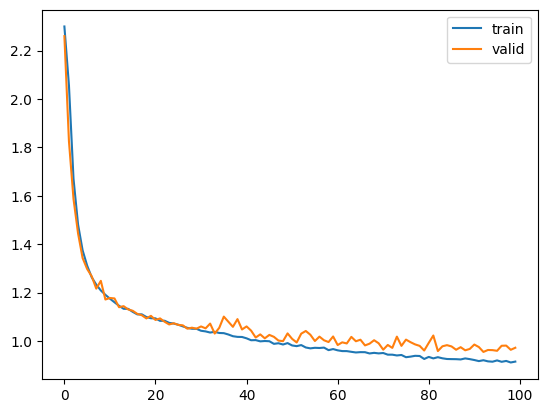%0A)

In \[94\]:

    # Predict the model on X_test
    y_pred2 = model_2.predict(X_test)

    # Predict using argmax
    y_pred_arg_2 = np.argmax(y_pred2, axis=1)

**Classification report**

In \[95\]:

    # Get the classification report on y_test and y_pred_arg_2
    cr = metrics.classification_report(y_test, y_pred_arg_2)
    print(cr)

                  precision    recall  f1-score   support

               0       0.73      0.76      0.75      1814
               1       0.72      0.70      0.71      1828
               2       0.69      0.76      0.72      1803
               3       0.70      0.64      0.67      1719
               4       0.73      0.80      0.77      1812
               5       0.68      0.64      0.66      1768
               6       0.68      0.73      0.70      1832
               7       0.80      0.70      0.74      1808
               8       0.64      0.66      0.65      1812
               9       0.72      0.67      0.69      1804

        accuracy                           0.71     18000
       macro avg       0.71      0.71      0.71     18000
    weighted avg       0.71      0.71      0.71     18000

**Confusion matrix**

In \[96\]:

    # Get the classification report on y_test and y_pred_arg_2
    cm2 = confusion_matrix(y_test, y_pred_arg_2)

    # Get the confusion matrix
    make_confusion_matrix(cm2, cmap='Blues')
    plt.show()

![](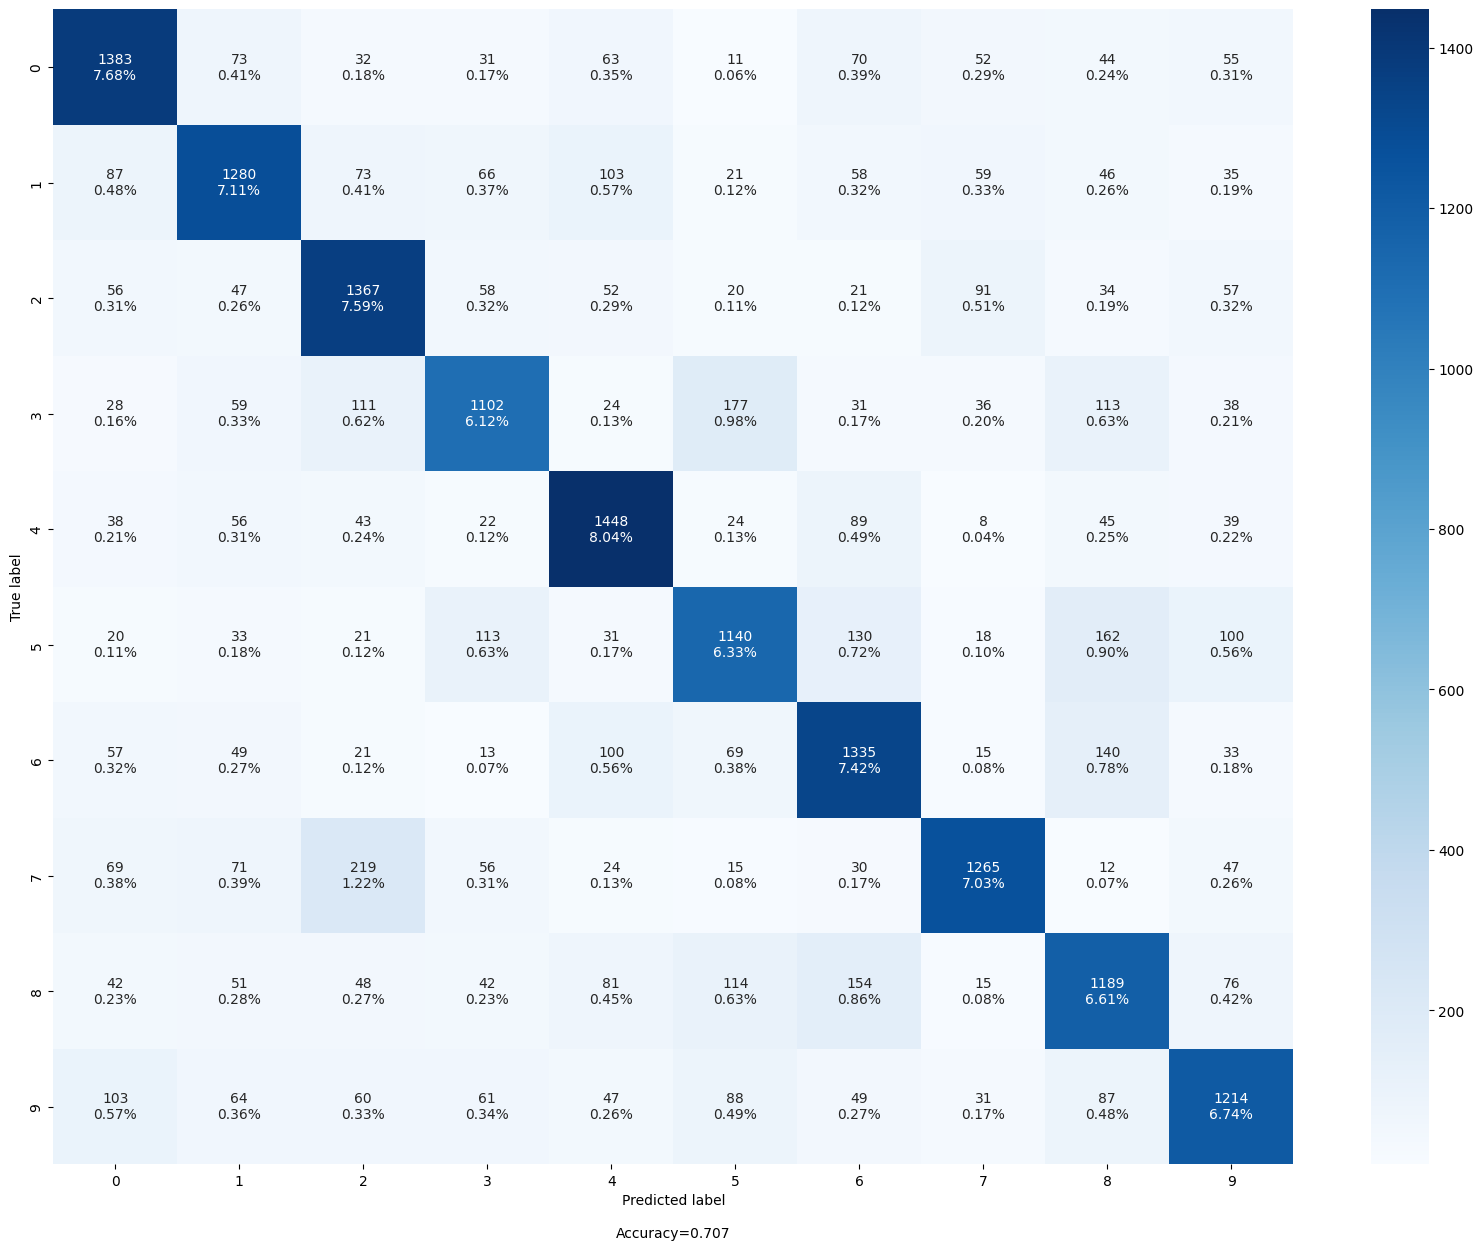%0A)

Comment

-   The accuracy of the adam optimizer tuned model is a little over 70%
-   The model is able to precisely predict the number 7 about 80% of the
    time

## Model Improvement: Neural Network model with Dropout<a href="#Model-Improvement:-Neural-Network-model-with-Dropout" class="anchor-link">¶</a>

In \[97\]:

    backend.clear_session()

    # Fixing the seed for random number generators so that we can ensure we receive the same output everytime
    np.random.seed(2)
    random.seed(2)
    tf.random.set_seed(2)

In \[98\]:

    # Initializing the neural network
    model_3 = Sequential()

    # Add the input layer with 32 neurons and relu as activation function
    model_3.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

    # Add dropout with dropout_rate = 0.2
    model_3.add(Dropout(0.2))

    # Add the hiden layer with 32 neurons and relu as activation function
    model_3.add(Dense(units=32, activation='relu'))

    # Add dropout with dropout_rate = 0.1
    model_3.add(Dropout(0.1))

    # Add the hiden layer with 8 neurons and relu as activation function
    model_3.add(Dense(units=8, activation='relu'))

    # Add the output layer with softmax as activation function with 10 neurons (We are predicting 10 classes)
    model_3.add(Dense(10, activation='softmax'))

In \[99\]:

    # Get the summary of the model_3
    model_3.summary()

    Model: "sequential"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     dense (Dense)               (None, 32)                32800     
                                                                     
     dropout (Dropout)           (None, 32)                0         
                                                                     
     dense_1 (Dense)             (None, 32)                1056      
                                                                     
     dropout_1 (Dropout)         (None, 32)                0         
                                                                     
     dense_2 (Dense)             (None, 8)                 264       
                                                                     
     dense_3 (Dense)             (None, 10)                90        
                                                                     
    =================================================================
    Total params: 34,210
    Trainable params: 34,210
    Non-trainable params: 0
    _________________________________________________________________

In \[100\]:

    # Initialize the ANN with Adam optimizer
    optimizer = tf.keras.optimizers.Adam(0.001)

    # Compile the model with categorical cross entropy as loss function and accuracy as metrics
    model_3.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In \[101\]:

    # Fit the model on X_train and y_train_en with 100 epochs
    history_3 = model_3.fit(
        X_train, y_train_en,
        batch_size=32,
        epochs=100,
        verbose=1,
        validation_split=0.2
    )

    Epoch 1/100
    1050/1050 [==============================] - 5s 4ms/step - loss: 2.3034 - accuracy: 0.1016 - val_loss: 2.3029 - val_accuracy: 0.0976
    Epoch 2/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3029 - val_accuracy: 0.0969
    Epoch 3/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 4/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 5/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 6/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 7/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1014
    Epoch 8/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.0969
    Epoch 9/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 10/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 11/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.0974
    Epoch 12/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 13/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 14/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 15/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 16/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1020 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 17/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 18/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy: 0.0965
    Epoch 19/100
    1050/1050 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1014
    Epoch 20/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 21/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 22/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 23/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 24/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 25/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1006 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 26/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 27/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1012 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 28/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 29/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.0974
    Epoch 30/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3029 - val_accuracy: 0.0969
    Epoch 31/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 32/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.0969
    Epoch 33/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3028 - val_accuracy: 0.0974
    Epoch 34/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 35/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1023 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 36/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 37/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 38/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1016 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 39/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 40/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1022 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 41/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.0976
    Epoch 42/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 43/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 44/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 45/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 46/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3027 - val_accuracy: 0.1014
    Epoch 47/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.1014
    Epoch 48/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1023 - val_loss: 2.3027 - val_accuracy: 0.1014
    Epoch 49/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1023 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 50/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 51/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1022 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 52/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3031 - val_accuracy: 0.0974
    Epoch 53/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1012 - val_loss: 2.3028 - val_accuracy: 0.0974
    Epoch 54/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 55/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 56/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.0974
    Epoch 57/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 58/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 59/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 60/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1027 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 61/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 62/100
    1050/1050 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1014
    Epoch 63/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 64/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 65/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 66/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.0969
    Epoch 67/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 68/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1014
    Epoch 69/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.0974
    Epoch 70/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 71/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 72/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1015 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 73/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 74/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 75/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1018 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 76/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 77/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 78/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3030 - val_accuracy: 0.0976
    Epoch 79/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 80/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 81/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1004 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 82/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3030 - val_accuracy: 0.0974
    Epoch 83/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1018 - val_loss: 2.3031 - val_accuracy: 0.0969
    Epoch 84/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 85/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0995 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 86/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1013 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 87/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1021 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 88/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 89/100
    1050/1050 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 90/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 91/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0974
    Epoch 92/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.1014
    Epoch 93/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 94/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.0969
    Epoch 95/100
    1050/1050 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3030 - val_accuracy: 0.1014
    Epoch 96/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.1003 - val_loss: 2.3028 - val_accuracy: 0.0974
    Epoch 97/100
    1050/1050 [==============================] - 3s 3ms/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.0974
    Epoch 98/100
    1050/1050 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 99/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.1021 - val_loss: 2.3028 - val_accuracy: 0.1014
    Epoch 100/100
    1050/1050 [==============================] - 4s 4ms/step - loss: 2.3027 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.1014

**Loss function**

In \[102\]:

    # Capturing learning history per epoch
    hist = pd.DataFrame(history_3.history)
    hist['epoch'] = history_3.epoch

    # Plotting accuracy at different epochs
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(('train', 'valid'), loc=0)

Out\[102\]:

    <matplotlib.legend.Legend at 0x797792a87880>

![](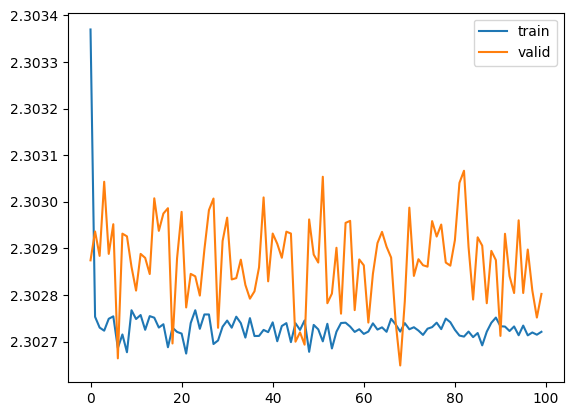%0A)

In \[103\]:

    # Predict the model on X_test
    y_pred3 = model_3.predict(X_test)

    # Predict using argmax
    y_pred_arg_3 = np.argmax(y_pred3, axis=1)

**Classification report**

In \[104\]:

    # Get the classification report on y_test and y_pred_arg_3
    cr = metrics.classification_report(y_test, y_pred_arg_3)
    print(cr)

                  precision    recall  f1-score   support

               0       0.00      0.00      0.00      1814
               1       0.00      0.00      0.00      1828
               2       0.00      0.00      0.00      1803
               3       0.10      1.00      0.17      1719
               4       0.00      0.00      0.00      1812
               5       0.00      0.00      0.00      1768
               6       0.00      0.00      0.00      1832
               7       0.00      0.00      0.00      1808
               8       0.00      0.00      0.00      1812
               9       0.00      0.00      0.00      1804

        accuracy                           0.10     18000
       macro avg       0.01      0.10      0.02     18000
    weighted avg       0.01      0.10      0.02     18000

**Confusion matrix**

In \[105\]:

    # Get the classification report on y_test and y_pred_arg_3
    cm2 = confusion_matrix(y_test, y_pred_arg_3)

    # Get the confusion matrix
    make_confusion_matrix(cm2, cmap='Blues')
    plt.show()

![](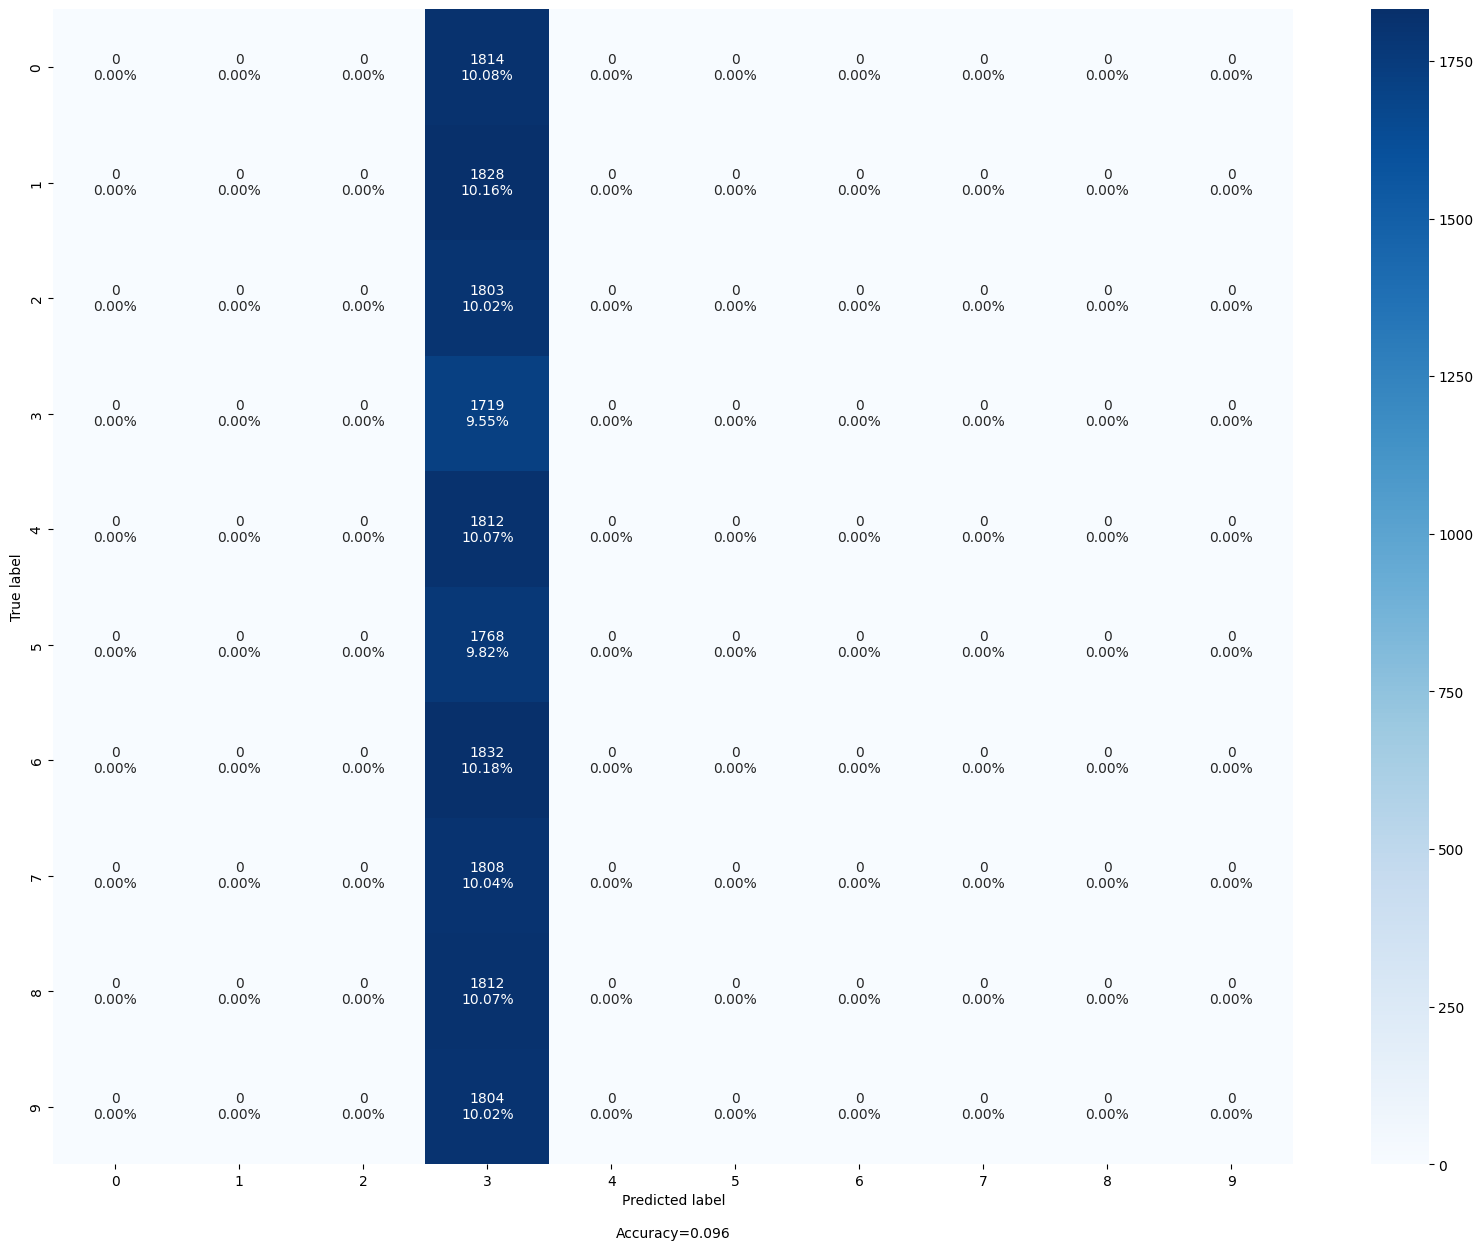%0A)

Comment

-   This model has the least accuracy score
-   The model seems to perform rather poorly compared and mostly
    unusable to the other two models

## Final Model selection<a href="#Final-Model-selection" class="anchor-link">¶</a>

From the above models, comparing their accuracies, in addition to other
measures shows that the Adam optimizer tuned model is second to the
"untuned" modelm with an accuracy rate of about 70% compared to 80% of
the original model.

## Insights and Recommendations<a href="#Insights-and-Recommendations" class="anchor-link">¶</a>

In \[105\]:

     

------------------------------------------------------------------------